In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import svd
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd

# Problem 1

In this problem we visualize the Wisconsin breast cancer dataset in two dimensions using PCA. First, rescale the data so that every feature has mean 0 and standard deviation 1 across the various points in the dataset. You may find `sklearn.preprocessing.StandardScaler` useful for this. Next, compute the top two principal components of the dataset using PCA, and for every data point, compute its coordinates (i.e. projections) along these two principal components. You should do this in two ways:
1. By using SVD directly. Do not use any PCA built-ins.
2. By using `sklearn.decomposition.PCA`.

The two approaches should give exactly the same result, and this also acts as a check. (But note that the signs of the singular vectors may be flipped in the two approaches since singular vectors are only determined uniquely up to sign. If this happens, flip signs to make everything identical again.)

Your final goal is to make a scatterplot of the dataset in 2 dimensions, where the x-axis is the first principal component and the y-axis is the second. Color the points by their diagnosis (malignant or benign). Do this for both approaches. Your plots should be identical. Does the data look roughly separable already in 2 dimensions?

In [16]:
from sklearn.preprocessing import StandardScaler


cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

#### Scaling the data
scaled_x=StandardScaler().fit_transform(X)

Text(0, 0.5, 'Principal component 2')

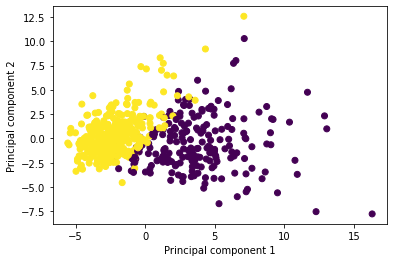

In [27]:
u, s, vh = np.linalg.svd(scaled_x, full_matrices=False)

u_new=u[:,:2]
s_new=s[:2]
svd_pca=u_new @ np.diag(s_new)*-1

plt.scatter(svd_pca[:,0],svd_pca[:,1],c=cancer['target'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

Text(0, 0.5, 'Principal component 2')

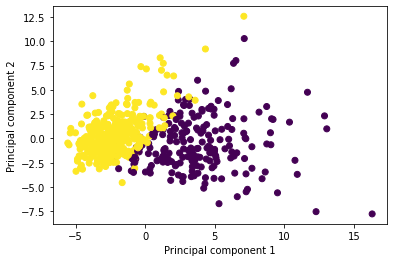

In [17]:
pca = PCA(n_components=2)
principals = pca.fit_transform(scaled_x)
plt.scatter(principals[:,0],principals[:,1],c=cancer['target'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
